In [1]:
import INS_Analysis as insd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
trials = '../../simulations/elemental_scan/gen/trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,6000,1001,14000,8016,name,filename,ptrac_filename
index,,,,,,,
0,-0.000100,-0.000100,-0.466600,-0.533200,concentration_C_0001_Si_4666,../compute/output/mctal/concentration_C_0001_S...,../compute/output/ptrac/concentration_C_0001_S...
1,-0.008667,-0.000300,-0.461600,-0.529433,concentration_C_008666666666666666_Si_4616,../compute/output/mctal/concentration_C_008666...,../compute/output/ptrac/concentration_C_008666...
2,-0.017233,-0.000500,-0.456600,-0.525667,concentration_C_017233333333333333_Si_4566,../compute/output/mctal/concentration_C_017233...,../compute/output/ptrac/concentration_C_017233...
3,-0.025800,-0.000700,-0.451600,-0.521900,concentration_C_0258_Si_4516,../compute/output/mctal/concentration_C_0258_S...,../compute/output/ptrac/concentration_C_0258_S...
4,-0.034933,-0.000967,-0.446267,-0.517833,concentration_C_03493333333333333_Si_446266666...,../compute/output/mctal/concentration_C_034933...,../compute/output/ptrac/concentration_C_034933...
5,-0.044067,-0.001233,-0.440933,-0.513767,concentration_C_044066666666666664_Si_44093333...,../compute/output/mctal/concentration_C_044066...,../compute/output/ptrac/concentration_C_044066...
6,-0.053200,-0.001500,-0.435600,-0.509700,concentration_C_0532_Si_4356,../compute/output/mctal/concentration_C_0532_S...,../compute/output/ptrac/concentration_C_0532_S...
7,-0.073800,-0.002067,-0.423600,-0.500533,concentration_C_0738_Si_4236,../compute/output/mctal/concentration_C_0738_S...,../compute/output/ptrac/concentration_C_0738_S...
8,-0.115000,-0.003200,-0.399600,-0.482200,concentration_C_115_Si_3996,../compute/output/mctal/concentration_C_115_Si...,../compute/output/ptrac/concentration_C_115_Si...


In [3]:
spectrums = '../../simulations/elemental_scan/gen/spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y'][:, 0, :]
trials['spectrum'] = [s for s in spectrums]

In [4]:
trials['Si'] = [-i for i in trials['14000']]

In [5]:
point_slope_areas, point_slope_fits = insd.calcPeakAreas(
    bins, 
    spectrums[0], 
    returnFits=True,
    peakWindows={
                'Si1': [1.4, 2.2],
                'Si2C1': [4.2, 4.8],
            },
    baselineFunction='point_slope',
    )

In [6]:
ps_areas = []
ps_fits = []
ef_areas = []
ef_fits = []
ft_areas = []
ft_fits = []
for trial in trials.index:
    spectrum = trials.loc[trial, 'spectrum']
    ps_area, ps_fit = insd.calcPeakAreas(
        bins, 
        spectrum, 
        returnFits=True,
        peakWindows={
                    'Si1': [1.4, 2.2],
                    'Si2C1': [4.2, 4.8],
                },
        baselineFunction='point_slope',
        )
    ps_areas.append(ps_area)
    ps_fits.append(ps_fit)

    ef_area, ef_fit = insd.calcPeakAreas(
        bins, 
        spectrum, 
        returnFits=True,
        peakWindows={
                    'Si1': [1.4, 2.2],
                    'Si2C1': [4.2, 4.8],
                },
        baselineFunction='exp_falloff',
        )
    ef_areas.append(ef_area)
    ef_fits.append(ef_fit)

    ft_area, ft_fit = insd.calcPeakAreas(
        bins, 
        spectrum, 
        returnFits=True,
        peakWindows={
                    'Si1': [1.4, 2.2],
                    'Si2C1': [4.2, 4.8],
                },
        baselineFunction='fat_tail',
        )
    ft_areas.append(ft_area)
    ft_fits.append(ft_fit)

trials['ps_areas'] = ps_areas
trials['ps_fits'] = ps_fits
trials['ef_areas'] = ef_areas
trials['ef_fits'] = ef_fits
trials['ft_areas'] = ft_areas
trials['ft_fits'] = ft_fits

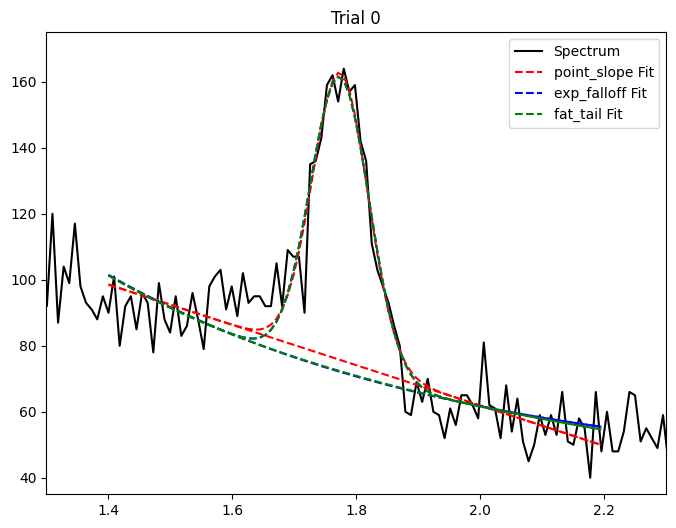

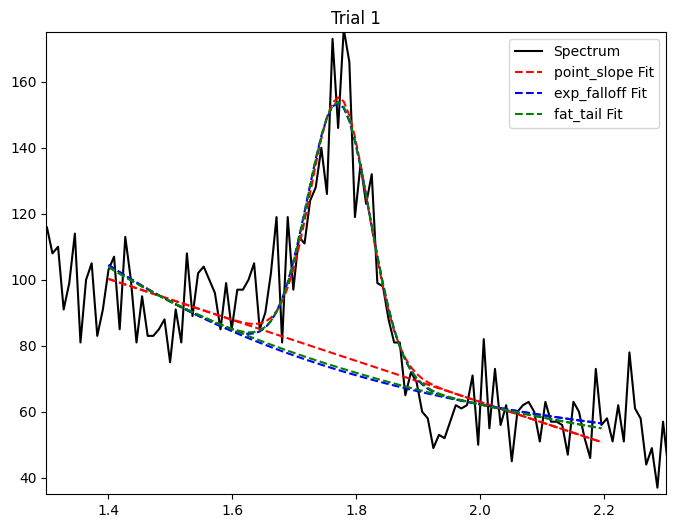

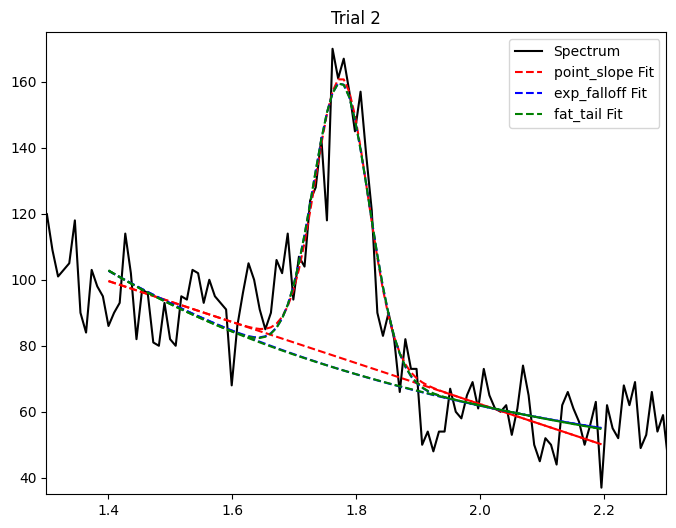

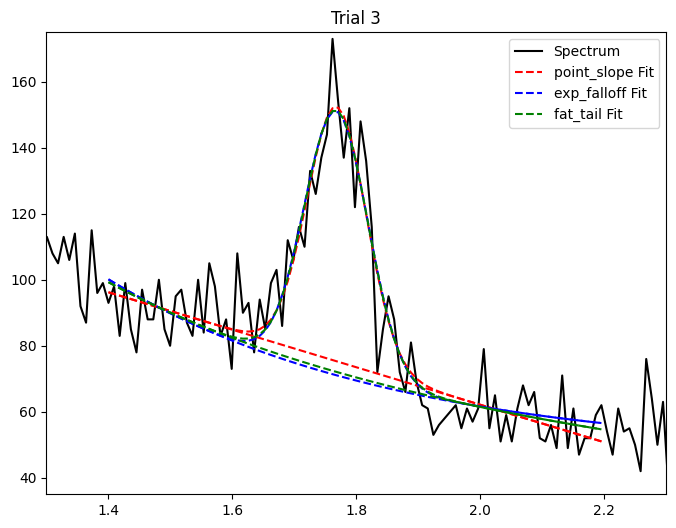

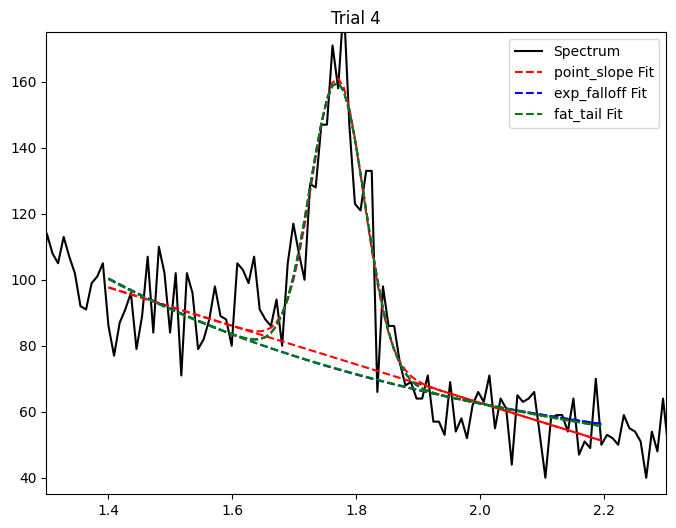

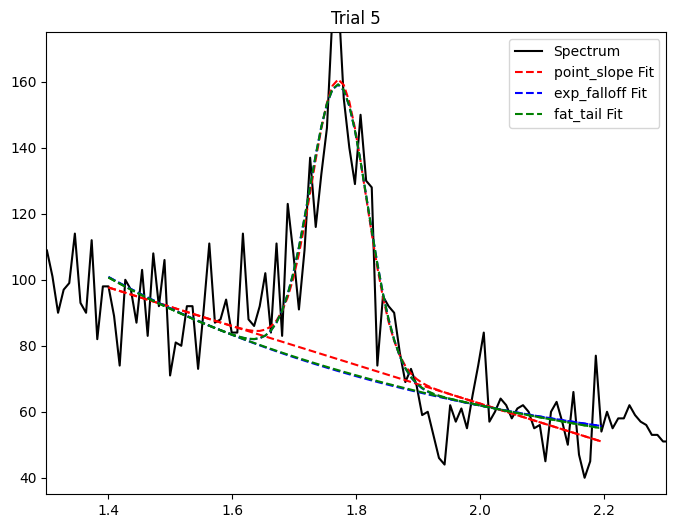

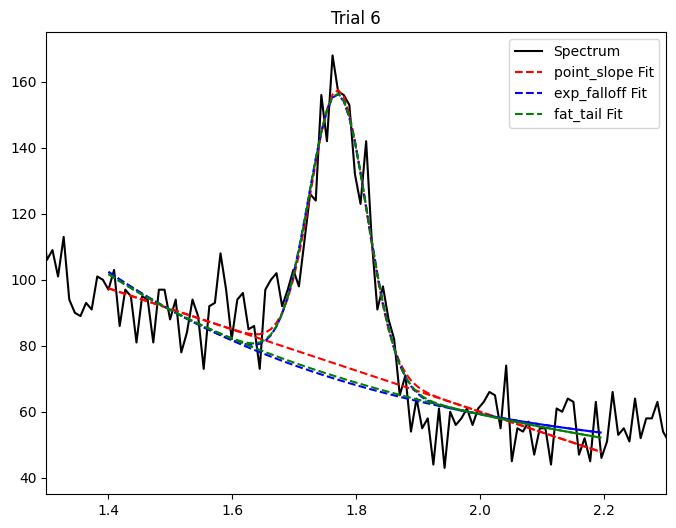

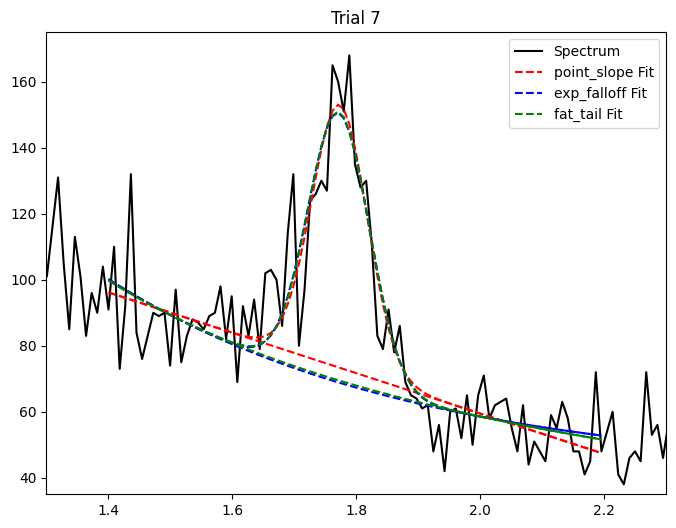

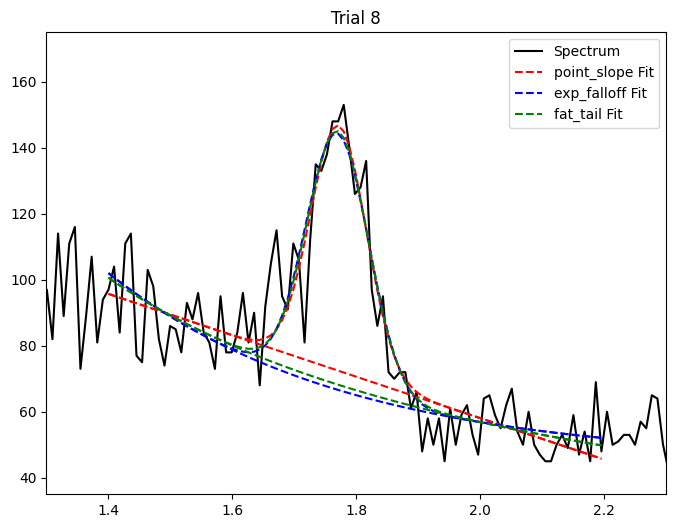

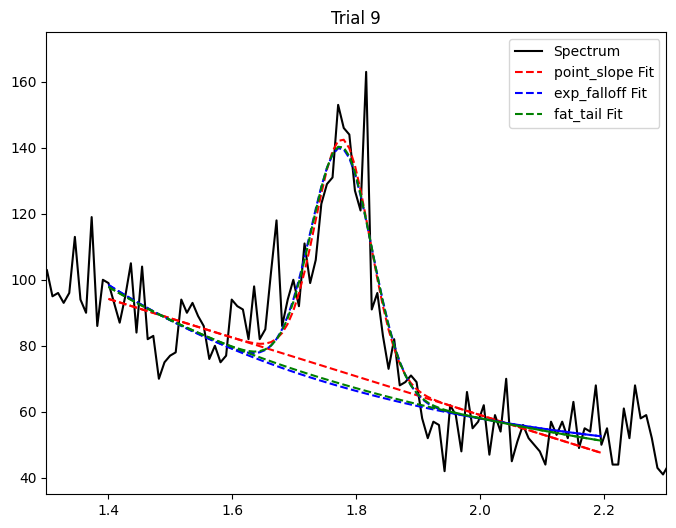

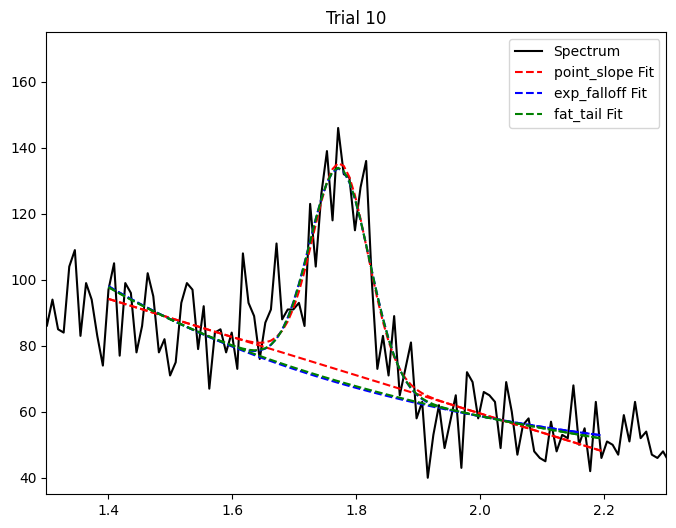

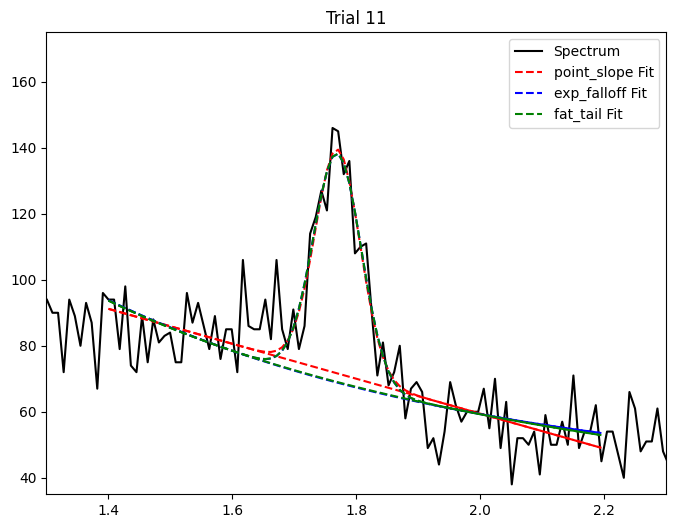

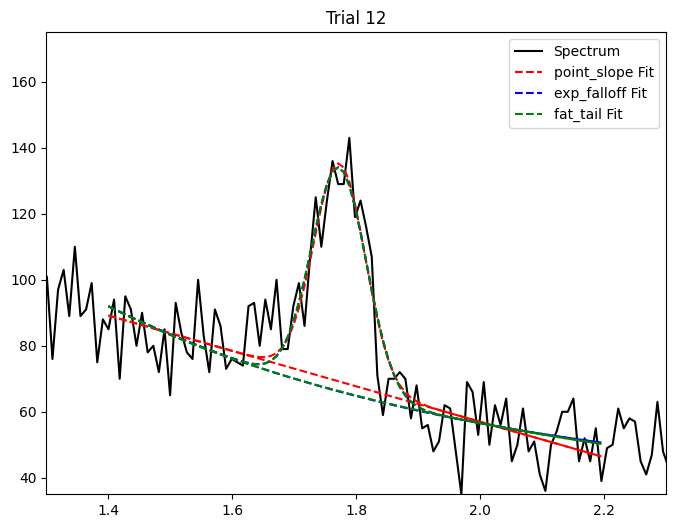

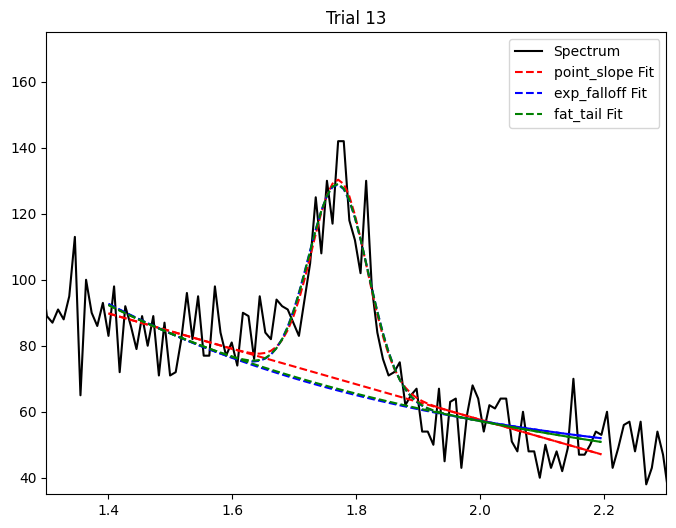

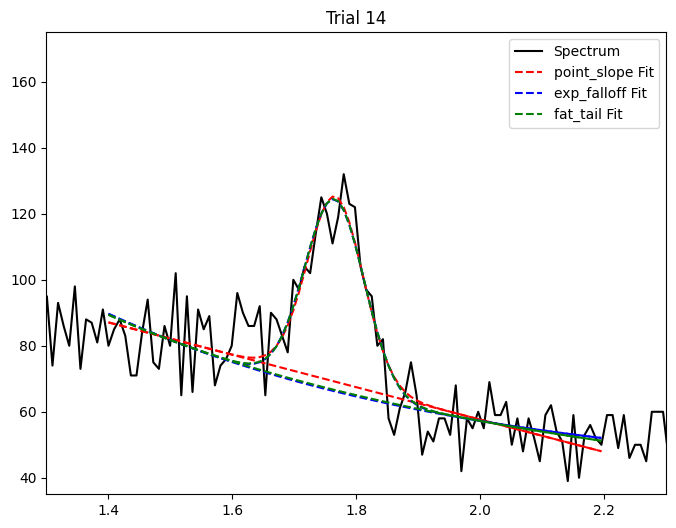

In [7]:
for trial in trials.index:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(bins, trials.loc[trial, 'spectrum'], label='Spectrum', color='black')
    ax.plot(trials.loc[trial, 'ps_fits']['Si1']['bins'], trials.loc[trial, 'ps_fits']['Si1']['baseline'], color='red', linestyle='--')
    ax.plot(trials.loc[trial, 'ps_fits']['Si1']['bins'], trials.loc[trial, 'ps_fits']['Si1']['peak'], label='point_slope Fit', color='red', linestyle='--')
    ax.plot(trials.loc[trial, 'ef_fits']['Si1']['bins'], trials.loc[trial, 'ef_fits']['Si1']['baseline'], color='blue', linestyle='--')
    ax.plot(trials.loc[trial, 'ef_fits']['Si1']['bins'], trials.loc[trial, 'ef_fits']['Si1']['peak'], label='exp_falloff Fit', color='blue', linestyle='--')
    ax.plot(trials.loc[trial, 'ft_fits']['Si1']['bins'], trials.loc[trial, 'ft_fits']['Si1']['baseline'], color='green', linestyle='--')
    ax.plot(trials.loc[trial, 'ft_fits']['Si1']['bins'], trials.loc[trial, 'ft_fits']['Si1']['peak'], label='fat_tail Fit', color='green', linestyle='--')
    ax.set_title(f'Trial {trial}')
    plt.xlim(1.3, 2.3)
    plt.ylim(35, 175)
    ax.legend()
    plt.show()

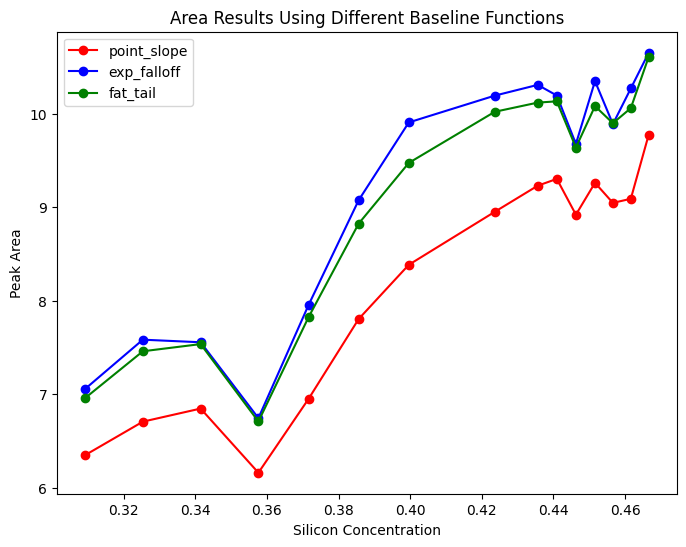

In [8]:
# graph the areas of each baseline function as the silicon concentration changes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(trials['Si'], trials['ps_areas'].apply(lambda x: x['Si1']), label='point_slope', color='red', marker='o')
ax.plot(trials['Si'], trials['ef_areas'].apply(lambda x: x['Si1']), label='exp_falloff', color='blue', marker='o')
ax.plot(trials['Si'], trials['ft_areas'].apply(lambda x: x['Si1']), label='fat_tail', color='green', marker='o')
ax.set_title('Area Results Using Different Baseline Functions')
ax.set_xlabel('Silicon Concentration')
ax.set_ylabel('Peak Area')
ax.legend()
plt.show()